In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import numpy as np

In [2]:
%matplotlib inline

In [4]:
# Reading the data
df = pd.read_csv(r'C:\Users\tyagir01\Desktop\Train_SU63ISt.csv')

In [5]:
# Removing non-essential columns
df.drop(columns=['ID'], inplace=True)
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [7]:
# Aggregating the dataset at daily level
## Creating a timestamp index
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
df.head()

C:\Users\tyagir01\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


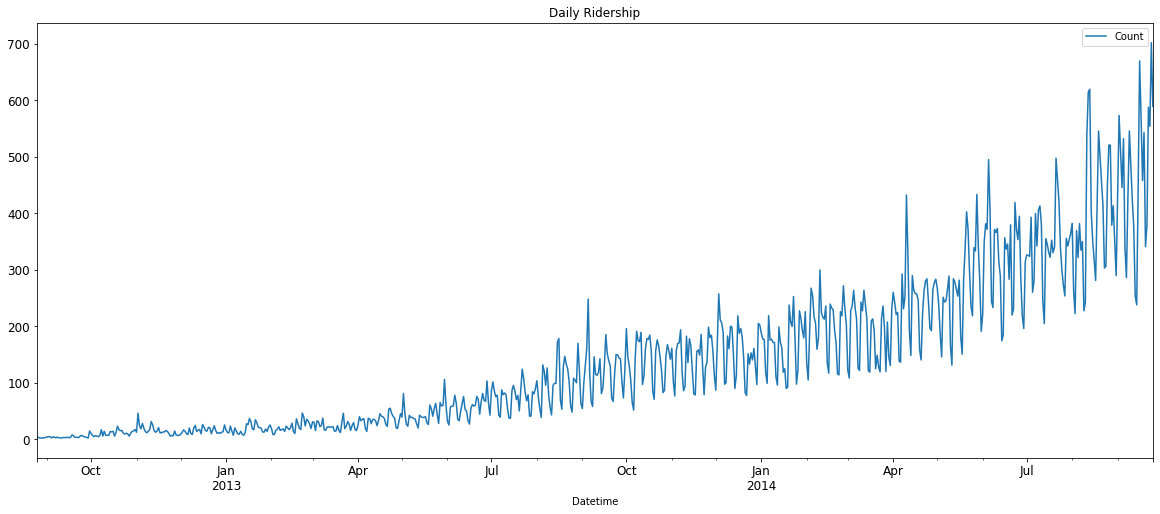

In [8]:
#Plotting data
df.plot(figsize=(20,8), title= 'Daily Ridership', fontsize=12)

In [7]:
# Calculating Rolling Statistics for the original data
roll_mean = df.rolling(window=30).mean()
roll_std = df.rolling(window=30).std()
print(roll_mean)

                 Count
Date_time             
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
...                ...
2014-09-21  427.086111
2014-09-22  436.577778
2014-09-23  444.833333
2014-09-24  453.294444
2014-09-25  455.575000

[762 rows x 1 columns]


In [8]:
print(roll_std)

                 Count
Date_time             
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
...                ...
2014-09-21  106.895925
2014-09-22  108.170600
2014-09-23  107.361833
2014-09-24  117.211190
2014-09-25  119.227228

[762 rows x 1 columns]


In [9]:
roll_mean.dropna()

,Count
Date_time,
2012-09-23,1.194442
2012-09-24,1.313639
2012-09-25,1.412918
2012-09-26,1.401642
2012-09-27,1.370984
...,...
2014-09-21,106.895925
2014-09-22,108.170600
2014-09-23,107.361833


In [10]:
roll_std.dropna()

,Count
Date_time,
2012-09-23,1.194442
2012-09-24,1.313639
2012-09-25,1.412918
2012-09-26,1.401642
2012-09-27,1.370984
...,...
2014-09-21,106.895925
2014-09-22,108.170600
2014-09-23,107.361833


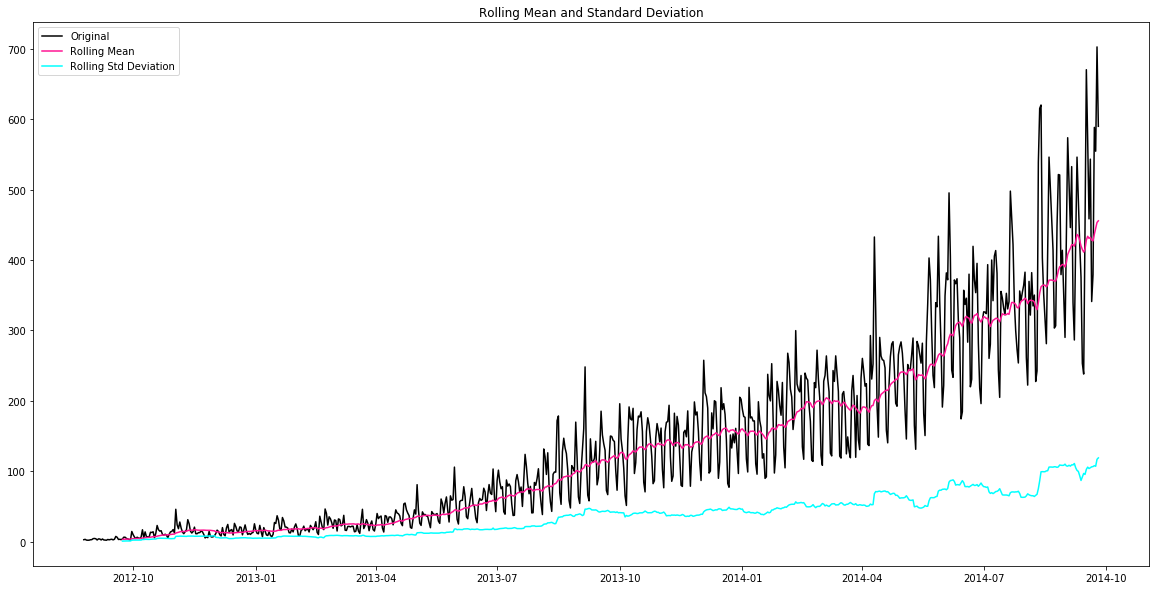

In [11]:
# Plotting Rolling Statistics for the Original Data
plt.figure(figsize=(20,10))
plt.plot(df, color = 'black', label = 'Original')
plt.plot(roll_mean, color = 'deeppink', label = 'Rolling Mean')
plt.plot(roll_std, color = 'cyan', label = 'Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

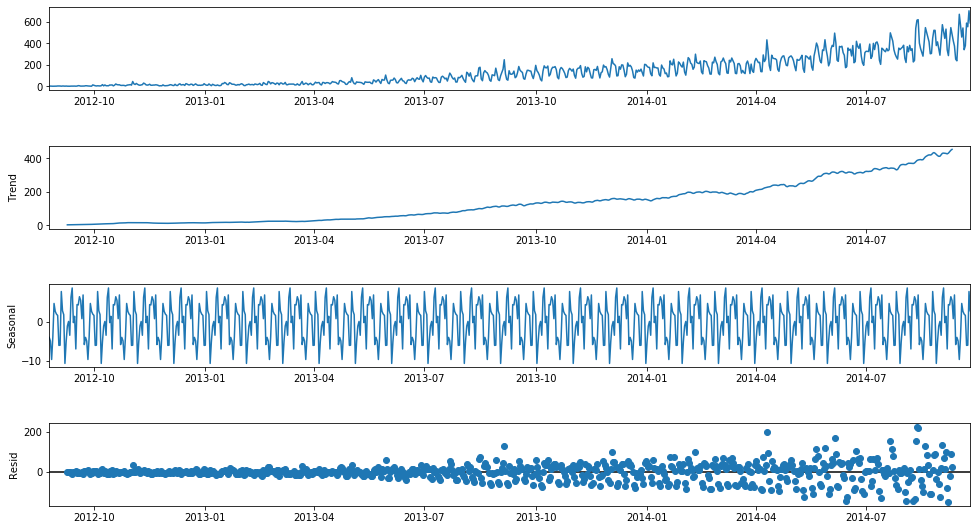

In [13]:
## Decomposing the data to check the trend, seasonality and Random Errors(Noise)/Residuals 
res = sm.tsa.seasonal_decompose(df,period=30)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [14]:
### Conducting the AD-Fuller Test on original data to check the stationarity
adf_test = sm.tsa.adfuller(df,regression='ctt')
print('p-value:{}'.format(adf_test[1]))

p-value:0.6615459145724623


In [15]:
## Differntiating the Data Set once ( d = 1)
# dropping the null value as well
df_diff = df.diff().dropna()
df_diff

,Count
Date_time,
2012-08-26,0.500000
2012-08-27,-1.083333
2012-08-28,-0.166667
2012-08-29,0.083333
2012-08-30,0.583333
...,...
2014-09-21,38.166667
2014-09-22,208.916667
2014-09-23,-33.833333


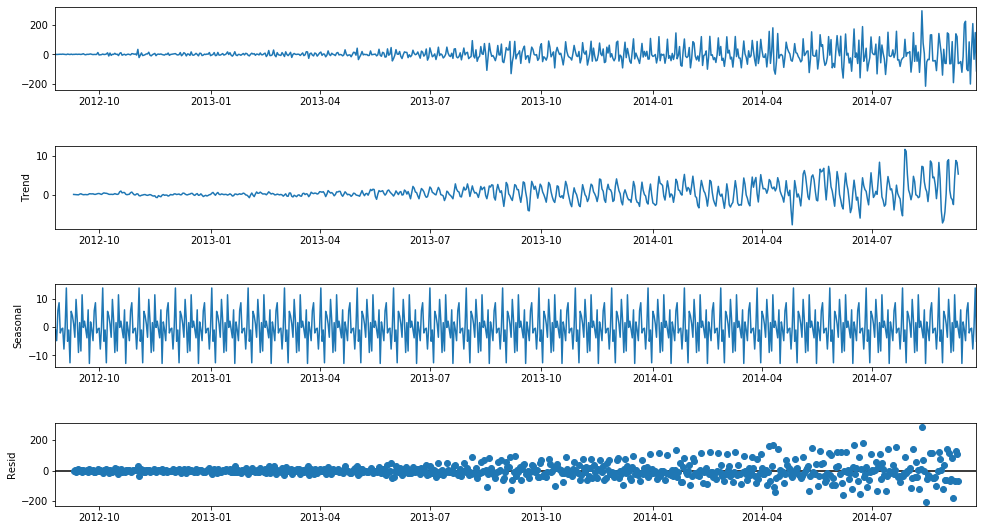

In [16]:
## Decomposing the differenced Time Series
res_diff = sm.tsa.seasonal_decompose(df_diff,period=30)
fig = res_diff.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [17]:
## Running the ADF Test on Differenced Time Series
adf_test2 = sm.tsa.adfuller(df_diff,regression='ctt')
print('p-value:{}'.format(adf_test2[1]))

p-value:1.615938910525683e-11


In [18]:
## Calculating the Rolling Statistics for the Differenced Data Series
roll_mean_diff = df_diff.rolling(window=30).mean()
roll_std_diff = df_diff.rolling(window=30).std()
roll_mean_diff.dropna()

,Count
Date_time,
2012-09-24,0.119444
2012-09-25,0.100000
2012-09-26,0.077778
2012-09-27,0.063889
2012-09-28,0.025000
...,...
2014-09-21,-1.169444
2014-09-22,9.491667
2014-09-23,8.255556


In [19]:
roll_std_diff.dropna()

,Count
Date_time,
2012-09-24,1.348812
2012-09-25,1.347340
2012-09-26,1.372788
2012-09-27,1.377446
2012-09-28,1.393257
...,...
2014-09-21,115.424451
2014-09-22,119.632088
2014-09-23,119.890110


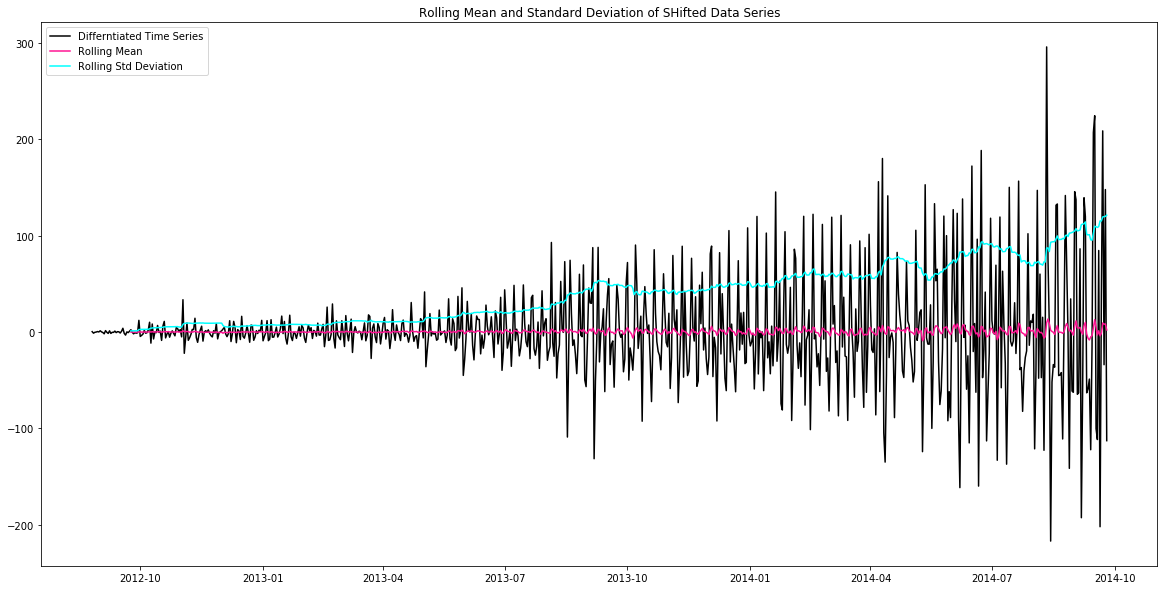

In [36]:
# Plotting the Rolling Stats for the Differenced Data Series
plt.figure(figsize=(20,10))
plt.plot(df_diff, color = 'black', label = 'Differntiated Time Series')
plt.plot(roll_mean_diff, color = 'deeppink', label = 'Rolling Mean')
plt.plot(roll_std_diff, color = 'cyan', label = 'Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation of SHifted Data Series')
plt.show(block=False)

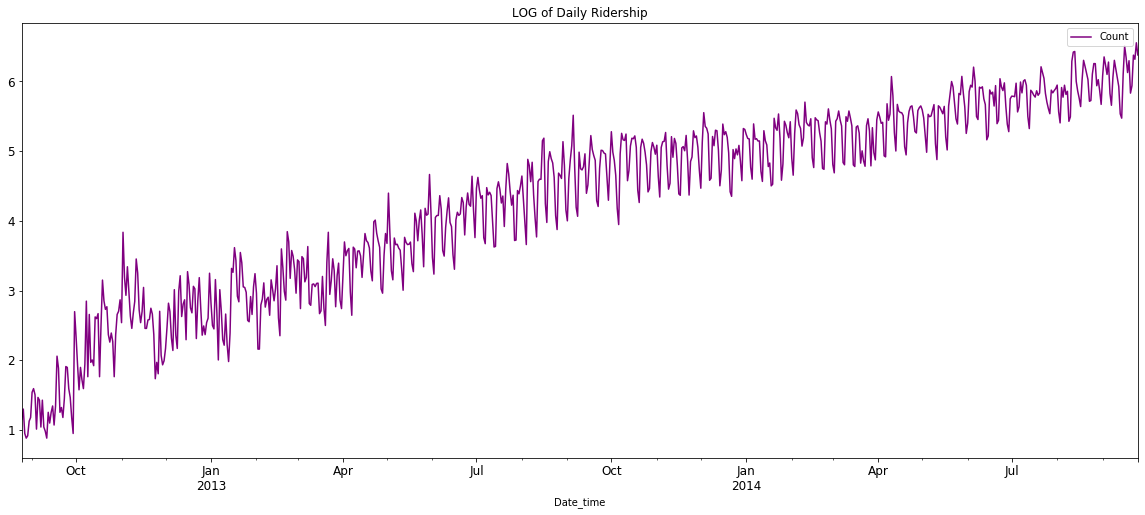

In [26]:
## Taking Log of the original Data Series and plotting the Log time series
df_log = np.log(df)
df_log.plot(figsize=(20,8), title= 'LOG of Daily Ridership', color = 'purple', fontsize=12)

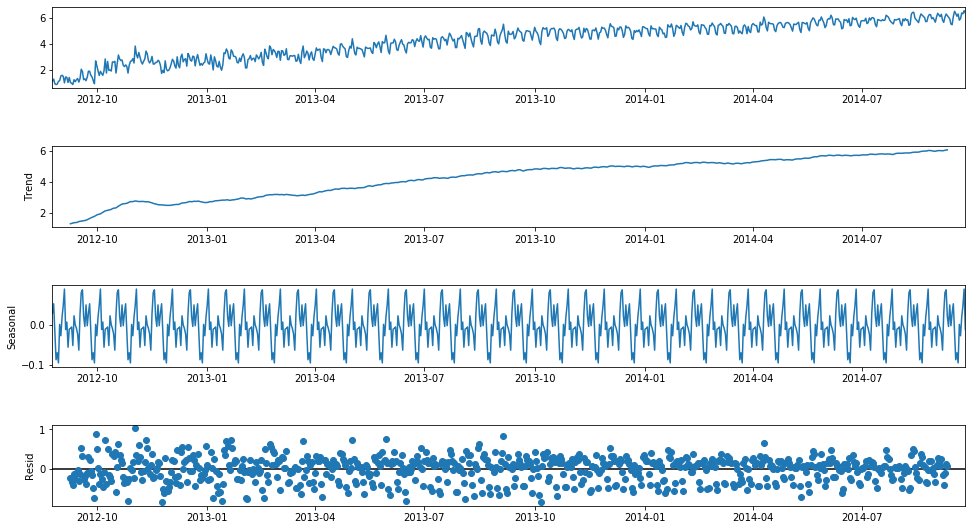

In [27]:
## Decomposition of Logged Data Series
res_log = sm.tsa.seasonal_decompose(df_log,period=30)
fig = res_log.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [28]:
## Running ADFULLER Test of Logged Data Series
adf_test3 = sm.tsa.adfuller(df_log,regression='ctt')
print('p-value:{}'.format(adf_test3[1]))

p-value:0.010597817691205364


In [29]:
# Calculating Roll-Stats for Logged Data Series
roll_mean_log = df_log.rolling(window=30).mean()
roll_std_log = df_log.rolling(window=30).std()
roll_mean_log.dropna()

,Count
Date_time,
2012-09-23,1.264164
2012-09-24,1.289392
2012-09-25,1.309320
2012-09-26,1.330772
2012-09-27,1.350237
...,...
2014-09-21,6.025093
2014-09-22,6.047157
2014-09-23,6.066890


In [30]:
roll_std_log.dropna()

,Count
Date_time,
2012-09-23,0.279690
2012-09-24,0.302493
2012-09-25,0.322216
2012-09-26,0.318810
2012-09-27,0.308138
...,...
2014-09-21,0.261298
2014-09-22,0.262164
2014-09-23,0.259404


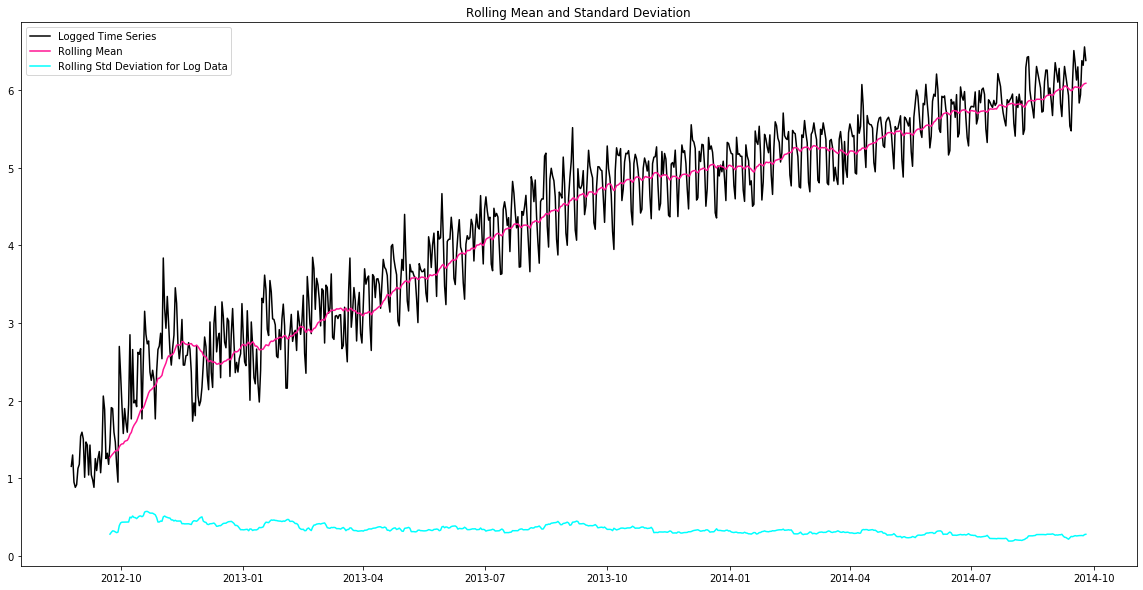

In [35]:
## Plotting the rolling stats for Logged Data
plt.figure(figsize=(20,10))
plt.plot(df_log, color = 'black', label = 'Logged Time Series')
plt.plot(roll_mean_log, color = 'deeppink', label = 'Rolling Mean')
plt.plot(roll_std_log, color = 'cyan', label = 'Rolling Std Deviation for Log Data')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [31]:
# Differentiating the log Data Series once 
df_log_dx = df_log.diff().dropna()
df_log_dx 

,Count
Date_time,
2012-08-26,0.146603
2012-08-27,-0.350202
2012-08-28,-0.066691
2012-08-29,0.033902
2012-08-30,0.209721
...,...
2014-09-21,0.106069
2014-09-22,0.438815
2014-09-23,-0.059244


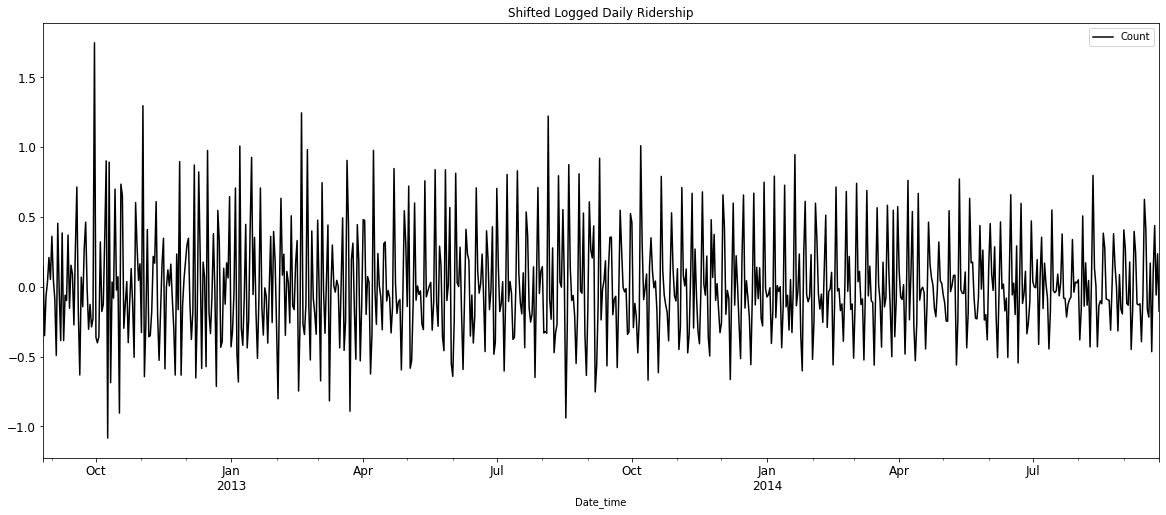

In [34]:
## Plotting the Data
df_log_dx.plot(figsize=(20,8), title= 'Shifted Logged Daily Ridership', color='black', fontsize=12)

In [37]:
## Running the ADF test on SHifted Log Data
adf_test4 = sm.tsa.adfuller(df_log_dx,regression='ctt')
print('p-value:{}'.format(adf_test4[1]))

p-value:5.435983943022382e-13


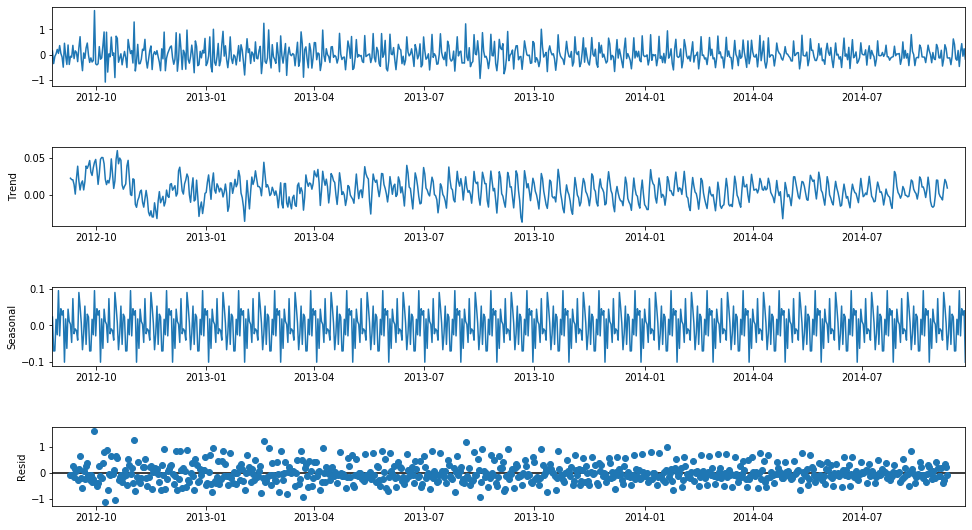

In [39]:
## Checking the Composition of Shifted Log Data
res_log_dx = sm.tsa.seasonal_decompose(df_log_dx,period=30)
fig = res_log_dx.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [40]:
## Rolling Stats for SHifted Log Data
roll_mean_log_dx = df_log_dx.rolling(window=30).mean()
roll_std_log_dx = df_log_dx.rolling(window=30).std()
roll_mean_log.dropna()

,Count
Date_time,
2012-09-23,1.264164
2012-09-24,1.289392
2012-09-25,1.309320
2012-09-26,1.330772
2012-09-27,1.350237
...,...
2014-09-21,6.025093
2014-09-22,6.047157
2014-09-23,6.066890


In [41]:
roll_std_log.dropna()

,Count
Date_time,
2012-09-23,0.279690
2012-09-24,0.302493
2012-09-25,0.322216
2012-09-26,0.318810
2012-09-27,0.308138
...,...
2014-09-21,0.261298
2014-09-22,0.262164
2014-09-23,0.259404


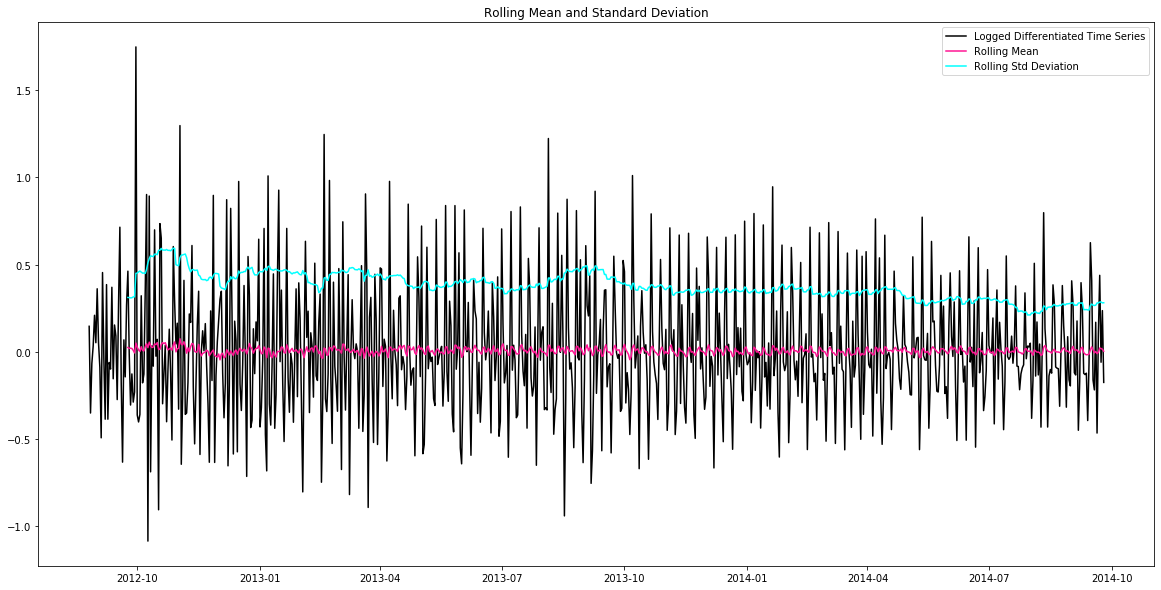

In [42]:
### Plotting the Rolling Stats for Shifted Log Data
plt.figure(figsize=(20,10))
plt.plot(df_log_dx, color = 'black', label = 'Logged Differentiated Time Series')
plt.plot(roll_mean_log_dx, color = 'deeppink', label = 'Rolling Mean')
plt.plot(roll_std_log_dx, color = 'cyan', label = 'Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

### Correlograms for Shifted Log Data

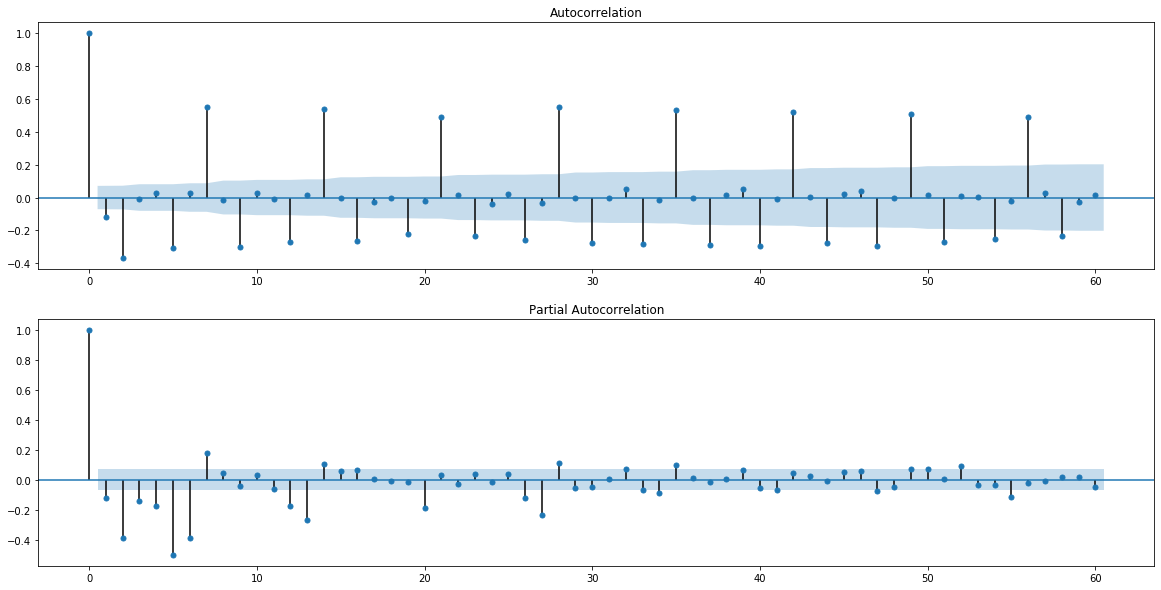

In [54]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(df_log_dx, lags=60, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df_log_dx, lags=60, ax=ax[1])
plt.show()

### ACF & PACF Plots

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

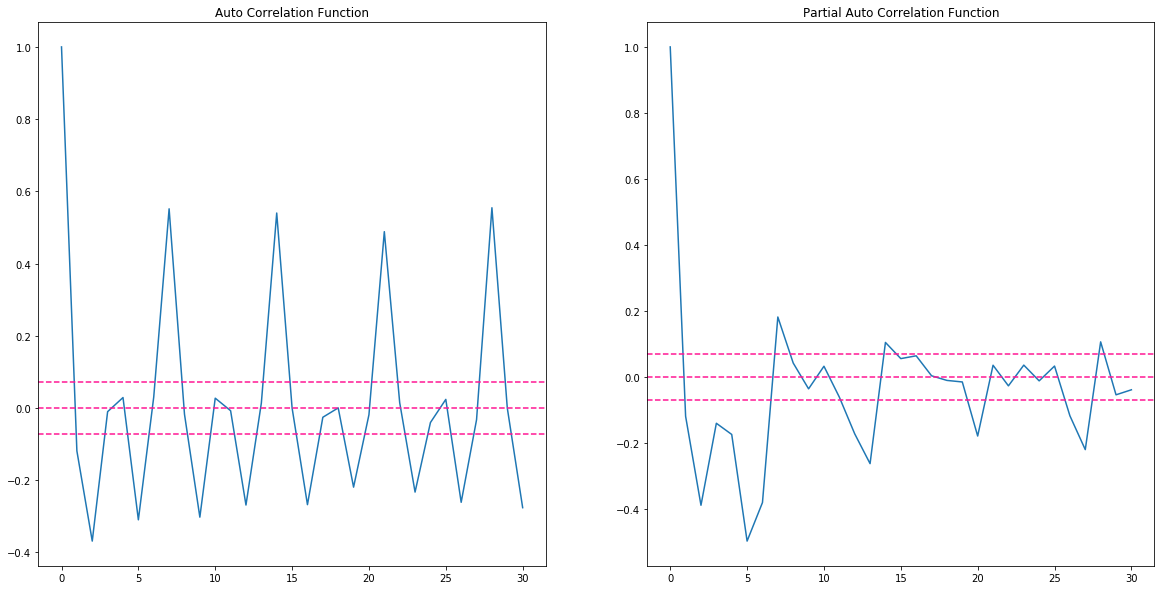

In [43]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_dx, nlags = 30, fft=True)
lag_pacf = pacf(df_log_dx, nlags = 30, method = 'ols',)

plt.figure(figsize=(20,10))
# Plot ACF :
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = '--', color = 'deeppink')
plt.axhline(y = -1.96/np.sqrt(len(df_log_dx)), linestyle = '--', color = 'deeppink')
plt.axhline(y = 1.96/np.sqrt(len(df_log_dx)), linestyle = '--', color = 'deeppink')
plt.title('Auto Correlation Function')

# Plot PACF :
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = '--', color = 'deeppink')
plt.axhline(y = -1.96/np.sqrt(len(df_log_dx)), linestyle = '--', color = 'deeppink')
plt.axhline(y = 1.96/np.sqrt(len(df_log_dx)), linestyle = '--', color = 'deeppink')
plt.title('Partial Auto Correlation Function')

plt.tight_layout

## Splitting the Dataset

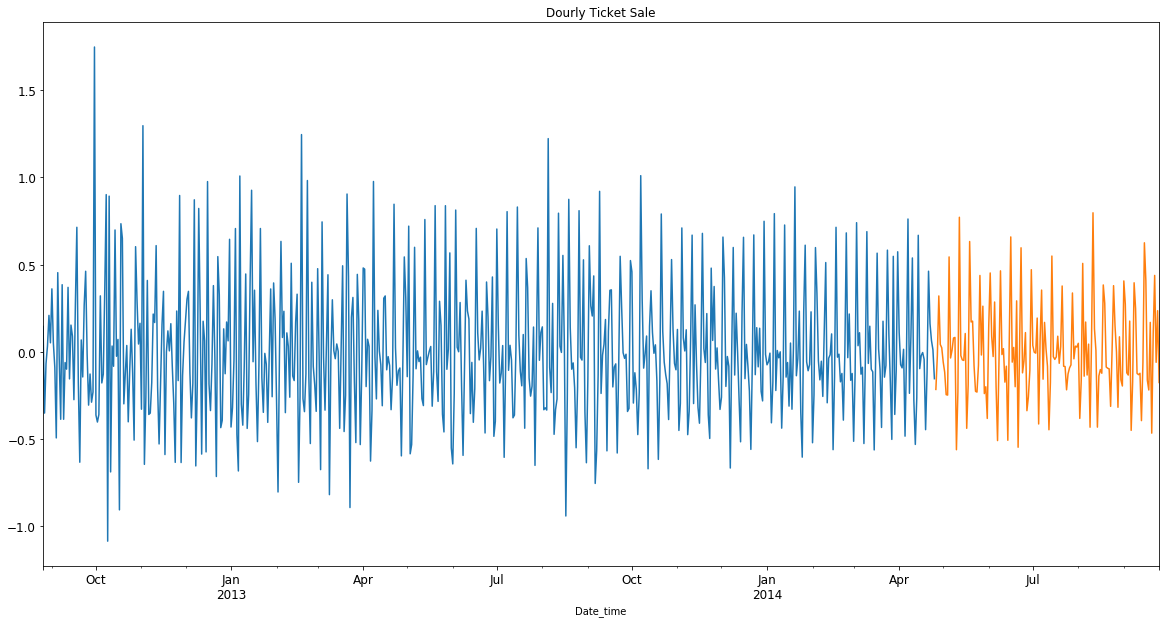

In [46]:
df_train_log = df_log_dx[:608]
df_test_log = df_log_dx[608:]
df_train_log.Count.plot(figsize=(20,10), title = 'Hourly Ticket Sale', fontsize=12)
df_test_log.Count.plot(figsize=(20,10), title = 'Dourly Ticket Sale', fontsize=12)
plt.show()

In [47]:
df_train_log.size

608

In [48]:
df_test_log.size

153

In [49]:
## Finding the best parameters for ARIMA model (p, q)
resDiff = sm.tsa.arma_order_select_ic(df_train_log, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_r

ARMA(p,q) = (5, 5) is the best.


C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [50]:
model = sm.tsa.statespace.SARIMAX(df_train_log, order=(5, 0, 5),seasonal_order=(0,1,1,30)).fit()
model.summary()

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Count   No. Observations:                  608
Model:             SARIMAX(5, 0, 5)x(0, 1, [1], 30)   Log Likelihood                -119.372
Date:                              Sun, 26 Jul 2020   AIC                            262.745
Time:                                      11:48:31   BIC                            315.060
Sample:                                  08-26-2012   HQIC                           283.144
                                       - 04-25-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7833      0.093      8.416      0.000       0.601       0.966
ar.L2         -1.4418      0.072    -19.901      0.000      -1.584      -1.300
ar.L3          0.8315      0.124      6.725      0.000       0.589       1.074
ar.L4         -0.9698      0.078    -12.496      0.000      -1.122      -0.818
ar.L5          0.0450      0.081      0.555      0.579      -0.114       0.204
ma.L1         -1.2563      0.086    -14.558      0.000      -1.425      -1.087
ma.L2          1.6823      0.084     20.044      0.000       1.518       1.847
ma.L3         -1.5268      0.104    -14.747      0.000      -1.730      -1.324
ma.L4          1.2276      0.088     13.910      0.000       1.055       1.401
ma.L5         -0.5029      0.073     -6.924      0.000      -0.645      -0.361
ma.S.L30      -0.9974      1.453     -0.686      0.493      -3.846       1.851
sigma2         0.0670      0.097      0.694      0.488      -0.122       0.256
===================================================================================
Ljung-Box (Q):                      119.73   Jarque-Bera (JB):                44.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

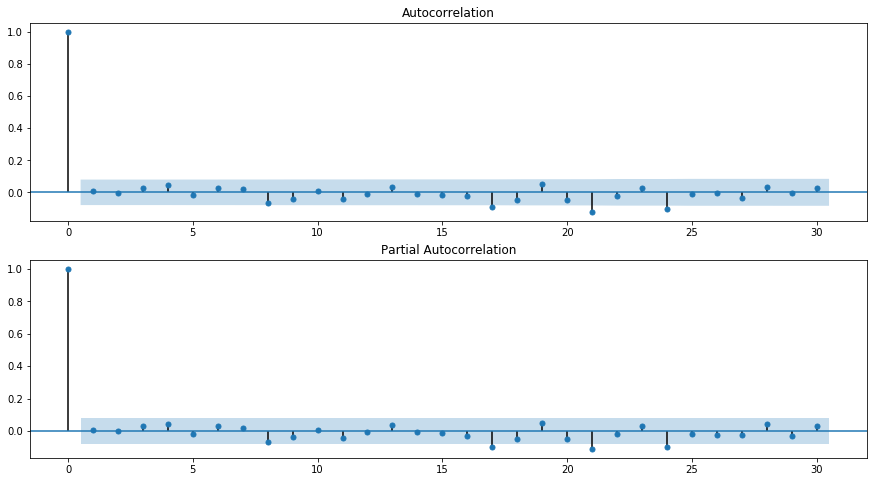

In [83]:
res_arima = fit_arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res_arima, lags=30, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res_arima, lags=30, ax=ax[1])
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
test_copy = df_test.copy()
test_copy['predictions'] = fit_arima.predict("2014-04-26", "2014-09-25", dynamic=True)
print('ARIMA model MSE:{}'.format(mean_squared_error(df_test.Count, test_copy.predictions)))

NameError: name 'df_test' is not defined

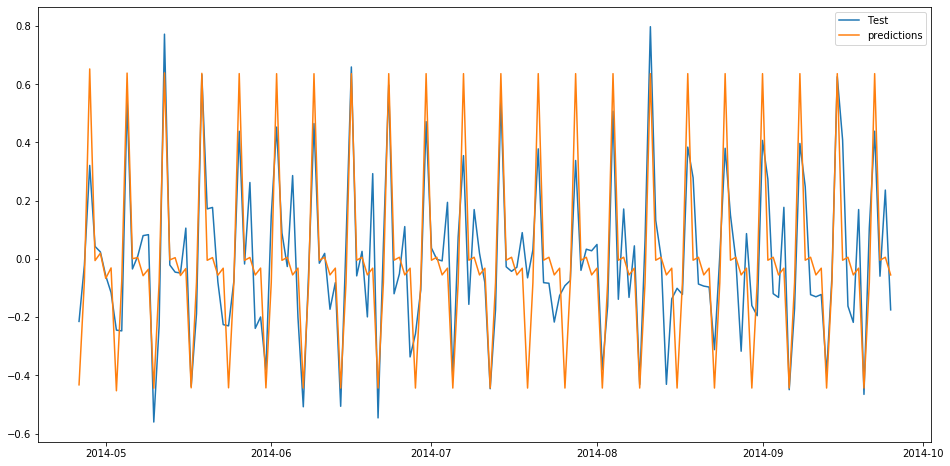

In [91]:
plt.figure(figsize=(16,8))
#plt.plot(df_train, label='Train')
plt.plot(df_test['Count'], label='Test')
plt.plot(test_copy['predictions'], label='predictions')
plt.legend(loc='best')
plt.show()

In [106]:
df_valid = pd.read_csv(r'C:\Users\tyagir01\Desktop\JetRail_test.csv', )
df_valid.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [107]:
df_valid.Timestamp = pd.to_datetime(df_valid.Datetime,format='%d-%m-%Y %H:%M')
df_valid.index = df_valid.Timestamp 

C:\Users\tyagir01\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [108]:
df_valid.resample('D').mean()

,ID
Datetime,
2014-09-26,18299.5
2014-09-27,18323.5
2014-09-28,18347.5
2014-09-29,18371.5
2014-09-30,18395.5
...,...
2015-04-22,23291.5
2015-04-23,23315.5
2015-04-24,23339.5


In [112]:
df_valid['predictions'] = np.exp(fit_arima.predict("2014-09-26", "2015-04-25", dynamic=True))
df_valid.dropna()

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


,ID,Datetime,predictions
Datetime,,,
2014-09-26,18288,26-09-2014 00:00,0.968780
2014-09-27,18312,27-09-2014 00:00,0.641855
2014-09-28,18336,28-09-2014 00:00,0.921766
2014-09-29,18360,29-09-2014 00:00,1.889788
2014-09-30,18384,30-09-2014 00:00,0.995666
...,...,...,...
2015-04-21,23256,21-04-2015 00:00,0.995666
2015-04-22,23280,22-04-2015 00:00,1.005829
2015-04-23,23304,23-04-2015 00:00,0.946662


In [1]:
plt.figure(figsize = (20,10))
fit_arima.predict(1,213)

NameError: name 'plt' is not defined

In [2]:
 pip install statsmodels --upgrade

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [51]:
X_train = df[:608]
X_test = df[608:]

In [58]:
X_train

,Count
Date_time,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000
...,...
2014-04-20,140.583333
2014-04-21,223.333333
2014-04-22,262.916667


In [59]:
X_test

,Count
Date_time,
2014-04-25,243.833333
2014-04-26,196.750000
2014-04-27,192.500000
2014-04-28,265.416667
2014-04-29,277.083333
...,...
2014-09-21,379.250000
2014-09-22,588.166667
2014-09-23,554.333333


In [52]:
model2 = sm.tsa.statespace.SARIMAX(X_train, order=(5, 1, 5),seasonal_order=(0,1,1,30)).fit()
model.summary()

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Count   No. Observations:                  608
Model:             SARIMAX(5, 0, 5)x(0, 1, [1], 30)   Log Likelihood                -119.372
Date:                              Sun, 26 Jul 2020   AIC                            262.745
Time:                                      17:24:16   BIC                            315.060
Sample:                                  08-26-2012   HQIC                           283.144
                                       - 04-25-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7833      0.093      8.416      0.000       0.601       0.966
ar.L2         -1.4418      0.072    -19.901      0.000      -1.584      -1.300
ar.L3          0.8315      0.124      6.725      0.000       0.589       1.074
ar.L4         -0.9698      0.078    -12.496      0.000      -1.122      -0.818
ar.L5          0.0450      0.081      0.555      0.579      -0.114       0.204
ma.L1         -1.2563      0.086    -14.558      0.000      -1.425      -1.087
ma.L2          1.6823      0.084     20.044      0.000       1.518       1.847
ma.L3         -1.5268      0.104    -14.747      0.000      -1.730      -1.324
ma.L4          1.2276      0.088     13.910      0.000       1.055       1.401
ma.L5         -0.5029      0.073     -6.924      0.000      -0.645      -0.361
ma.S.L30      -0.9974      1.453     -0.686      0.493      -3.846       1.851
sigma2         0.0670      0.097      0.694      0.488      -0.122       0.256
===================================================================================
Ljung-Box (Q):                      119.73   Jarque-Bera (JB):                44.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
test_valid

,Count,predictions
Date_time,,
2014-04-25,243.833333,231.377398
2014-04-26,196.750000,111.130206
2014-04-27,192.500000,181.834934
2014-04-28,265.416667,258.522005
2014-04-29,277.083333,278.157870
...,...,...
2014-09-21,379.250000,226.319128
2014-09-22,588.166667,281.438304
2014-09-23,554.333333,290.353093


In [62]:
test_valid = X_test.copy()
test_valid['predictions'] = model2.predict("2014-04-25", "2014-09-25", dynamic=True)
print('ARIMA model MSE:{}'.format(mean_squared_error(X_test.Count, test_valid.predictions))

ARIMA model MSE:13375.244960298576


In [64]:
rmse = np.sqrt(mean_squared_error(X_test.Count, test_valid.predictions))
print(rmse)

115.65139411307837


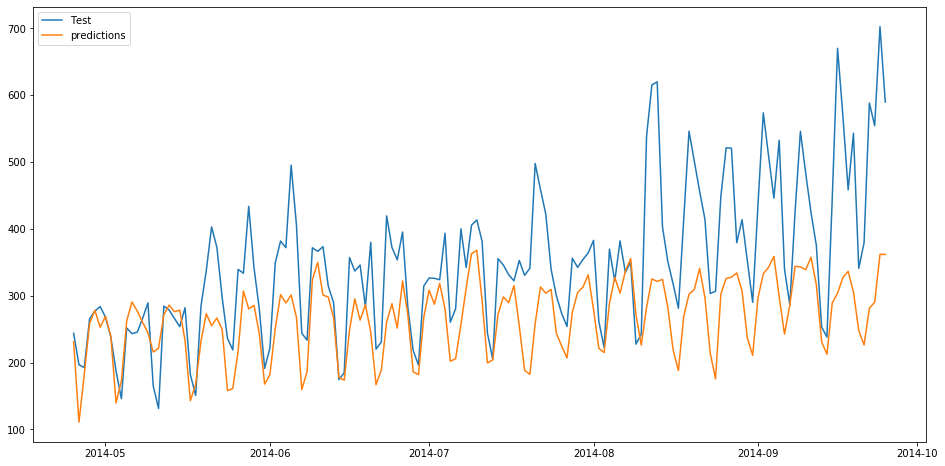

In [63]:
plt.figure(figsize=(16,8))
#plt.plot(df_train, label='Train')
plt.plot(X_test['Count'], label='Test')
plt.plot(test_valid['predictions'], label='predictions')
plt.legend(loc='best')
plt.show()

In [65]:
resDiff = sm.tsa.arma_order_select_ic(X_train, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\tyagir01\Anaconda3\lib\site-packag

ARMA(p,q) = (7, 4) is the best.


In [104]:
model_best = sm.tsa.statespace.SARIMAX(X_train, order=(7, 1, 4),seasonal_order=(0,1,1,30)).fit()

C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tyagir01\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
test_valid['predictions_best'] = model_best.predict("2014-04-25", "2014-09-25", dynamic=True)
print('ARIMA model MSE:{}'.format(mean_squared_error(X_test.Count, test_valid.predictions_best)))

ARIMA model MSE:16569.693026099685


In [92]:
#test_valid

,Count,predictions,predictions_best
Date_time,,,
2014-04-25,243.833333,231.377398,259.326078
2014-04-26,196.750000,111.130206,184.341205
2014-04-27,192.500000,181.834934,152.051146
2014-04-28,265.416667,258.522005,263.324279
2014-04-29,277.083333,278.157870,276.398521
...,...,...,...
2014-09-21,379.250000,226.319128,256.475901
2014-09-22,588.166667,281.438304,369.462862
2014-09-23,554.333333,290.353093,368.796129


In [100]:
rms = np.sqrt(mean_squared_error(X_test.Count, test_valid.predictions_best))
print(rms)

102.83458552093013


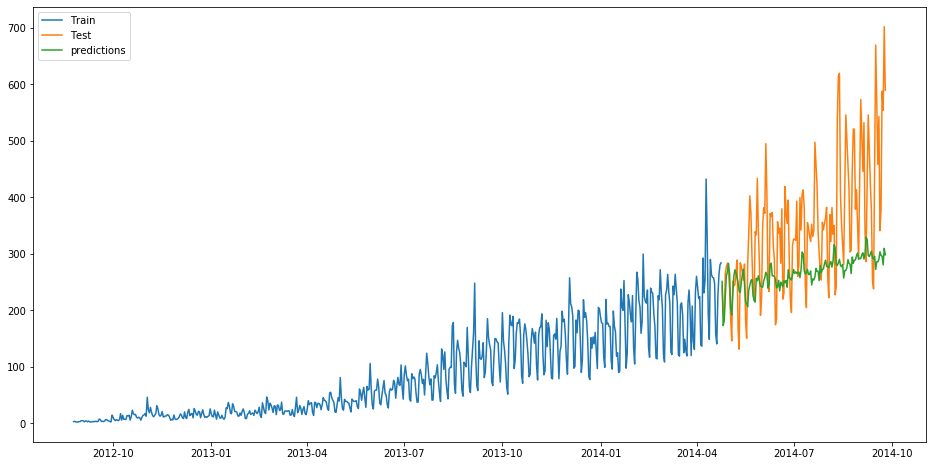

In [103]:
plt.figure(figsize=(16,8))
plt.plot(X_train, label='Train')
plt.plot(X_test['Count'], label='Test')
plt.plot(test_valid['predictions_best'], label='predictions')
plt.legend(loc='best')
plt.show()